In [1]:
# Import Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import scipy as stats
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

### Data collection

In [2]:
# load dataset
state_reg = pd.read_excel("C:\\Users\\DELL\\OneDrive\\Desktop\\US data\\States_Electric_Vehicle_Registrations_2018.xlsx")

In [3]:
state_reg.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,Electric Vehicle Registrations by State,NaN,NaN,NaN
1,NaN,State,Registration Count,NaN,NaN
2,NaN,Alabama,1450,NaN,NaN


In [4]:
state_reg.tail(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
51,NaN,Wisconsin,3680,NaN,NaN
52,NaN,Wyoming,170,NaN,NaN
53,NaN,Total,543610,NaN,NaN


In [5]:
energy_gen = pd.read_excel("C:\\Users\\DELL\\OneDrive\\Desktop\\US data\\States_Annual_Energy_Generation_Sources_1990_2019.xlsx")

In [6]:
energy_gen.head(4)

,State Historical Tables for 2019\nReleased: September 2020\nRevised: February 2021\nNext Update: November 2021,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
1,1990,AK,Total Electric Power Industry,Total,5599506
2,1990,AK,Total Electric Power Industry,Coal,510573
3,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521


In [7]:
energy_gen.tail(3)

,State Historical Tables for 2019\nReleased: September 2020\nRevised: February 2021\nNext Update: November 2021,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
53754,2019,WY,"Electric Generators, Electric Utilities",Natural Gas,411640
53755,2019,WY,"Electric Generators, Electric Utilities",Petroleum,43547
53756,2019,WY,"Electric Generators, Electric Utilities",Wind,1853341


In [8]:
state_code = pd.read_excel("C:\\Users\\DELL\\OneDrive\\Desktop\\US data\\state_codes.xlsx")

In [9]:
state_code.head(3)

,state_code,state_name
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas


In [10]:
state_code.tail(3)

,state_code,state_name
48,WI,Wisconsin
49,WV,West Virginia
50,WY,Wyoming


In [11]:
state_code[state_code["state_name"]=="Total"]

,state_code,state_name


### Data cleaning

In [12]:
# check for Missing values 
round(state_reg.isnull().sum()/state_reg.shape[0]*100)

Unnamed: 0    100.0
Unnamed: 1      0.0
Unnamed: 2      2.0
Unnamed: 3    100.0
Unnamed: 4     85.0
dtype: float64

In [13]:
# Assign column names
state_reg.columns = ["delete1", "State", "Registration_Count", "delete2", "delete3"]  
state_reg.head()

,delete1,State,Registration_Count,delete2,delete3
0,NaN,Electric Vehicle Registrations by State,NaN,NaN,NaN
1,NaN,State,Registration Count,NaN,NaN
2,NaN,Alabama,1450,NaN,NaN
3,NaN,Alaska,530,NaN,NaN
4,NaN,Arizona,15000,NaN,NaN


In [14]:
# drop unrelated columns
state_reg = state_reg.drop(columns=["delete1", "delete2", "delete3"]) 

In [15]:
state_reg.head()

,State,Registration_Count
0,Electric Vehicle Registrations by State,NaN
1,State,Registration Count
2,Alabama,1450
3,Alaska,530
4,Arizona,15000


In [16]:
# Drop rows with index 0 and 1
state_reg = state_reg.drop(index=[0, 1])  


In [17]:
state_reg.head()

,State,Registration_Count
2,Alabama,1450
3,Alaska,530
4,Arizona,15000
5,Arkansas,520
6,California,256800


In [18]:
state_reg = state_reg.drop(state_reg.index[-1])
state_reg.tail(3)


,State,Registration_Count
50,West Virginia,230
51,Wisconsin,3680
52,Wyoming,170


In [19]:
print(state_reg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 2 to 52
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               51 non-null     object
 1   Registration_Count  51 non-null     object
dtypes: object(2)
memory usage: 948.0+ bytes
None


In [20]:
##change data type 
state_reg["Registration_Count"]=state_reg["Registration_Count"].astype("int")

In [21]:
# check for duplicated values
state_reg.duplicated().sum()

np.int64(0)

In [22]:
# check for missing values
round(energy_gen.isnull().sum()/energy_gen.shape[0]*100)

State Historical Tables for 2019\nReleased: September 2020\nRevised: February 2021\nNext Update: November 2021    0.0
Unnamed: 1                                                                                                        0.0
Unnamed: 2                                                                                                        0.0
Unnamed: 3                                                                                                        0.0
Unnamed: 4                                                                                                        0.0
dtype: float64

In [23]:
 # assign  column names
energy_gen.columns = ["Year","State","Type of Producer","Energy Source","Genration"]
energy_gen.head()

,Year,State,Type of Producer,Energy Source,Genration
0,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
1,1990,AK,Total Electric Power Industry,Total,5599506
2,1990,AK,Total Electric Power Industry,Coal,510573
3,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521
4,1990,AK,Total Electric Power Industry,Natural Gas,3466261


In [24]:
# Drop rows with index 0 
energy_gen = energy_gen.drop(index=[0])  
energy_gen.head()


,Year,State,Type of Producer,Energy Source,Genration
1,1990,AK,Total Electric Power Industry,Total,5599506
2,1990,AK,Total Electric Power Industry,Coal,510573
3,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521
4,1990,AK,Total Electric Power Industry,Natural Gas,3466261
5,1990,AK,Total Electric Power Industry,Petroleum,497116


In [25]:
energy_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53756 entries, 1 to 53756
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              53756 non-null  object
 1   State             53756 non-null  object
 2   Type of Producer  53756 non-null  object
 3   Energy Source     53756 non-null  object
 4   Genration         53756 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [26]:
##change data type 
energy_gen["Genration"]=energy_gen["Genration"].astype("int")

In [27]:
# check for duplicated values
energy_gen.duplicated().sum()

np.int64(0)

In [28]:
# Check for missing value
state_code.isnull().sum()

state_code    0
state_name    0
dtype: int64

In [29]:
# check for duplicated values
state_code.duplicated().sum() 

np.int64(0)

In [30]:
energy_gen[energy_gen["Genration"]<0]

,Year,State,Type of Producer,Energy Source,Genration
160,1990,CO,Total Electric Power Industry,Pumped Storage,-33198
170,1990,CO,"Electric Generators, Electric Utilities",Pumped Storage,-33198
504,1990,MA,Total Electric Power Industry,Pumped Storage,-669583
517,1990,MA,"Electric Generators, Electric Utilities",Pumped Storage,-669583
610,1990,MI,Total Electric Power Industry,Pumped Storage,-694986
...,...,...,...,...,...
53601,2019,VT,"Electric Generators, Electric Utilities",Other,-933
53645,2019,WA,"Electric Generators, Electric Utilities",Other,-372
53705,2019,WV,Total Electric Power Industry,Other,-6418
53720,2019,WV,"Electric Generators, Independent Power Producers",Other,-6301


In [31]:
round(energy_gen[energy_gen["Genration"]<0].count()/energy_gen.shape[0]*100)

Year                2.0
State               2.0
Type of Producer    2.0
Energy Source       2.0
Genration           2.0
dtype: float64

In [32]:
# drop negitive values
energy_gen.drop(energy_gen[energy_gen["Genration"] < 0].index, inplace=True)

In [52]:
# replace value
energy_gen["State"].replace({"US-Total":"US-TOTAL"},inplace = True)

### Data Exploration

In [53]:
state_reg.describe()

,Registration_Count
count,51.000000
mean,10659.019608
std,35793.028330
min,170.000000
25%,1015.000000
50%,3450.000000
75%,8225.000000
max,256800.000000


In [54]:
energy_gen.describe()

,Genration
count,5.275500e+04
mean,1.726651e+07
std,1.322029e+08
min,0.000000e+00
25%,3.212650e+04
50%,3.597590e+05
75%,3.593064e+06
max,4.178277e+09


In [55]:
state_code.describe()

,state_code,state_name
count,51,51
unique,51,51
top,AK,Alaska
freq,1,1


In [56]:
state_reg.head(3)

,State,Registration_Count
2,Alabama,1450
3,Alaska,530
4,Arizona,15000


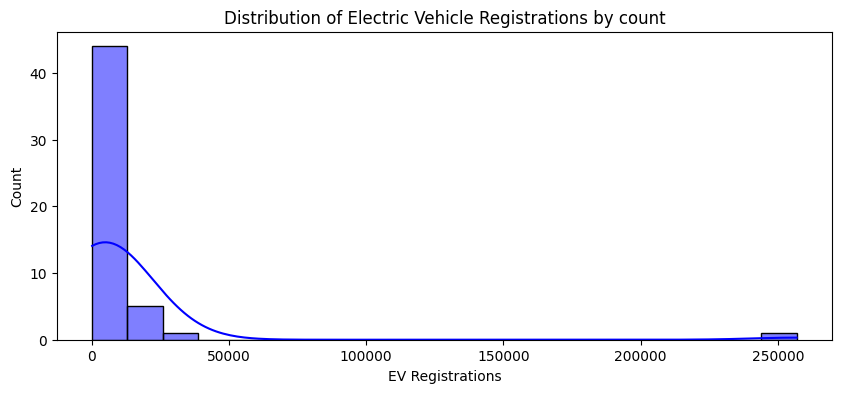

In [57]:
# Distribution of EV Registrations
plt.figure(figsize=(10, 4))
sns.histplot(state_reg["Registration_Count"], bins=20, kde=True, color="blue")
plt.title("Distribution of Electric Vehicle Registrations by count")
plt.xlabel("EV Registrations")
plt.ylabel("Count")
plt.show()

### Distribution of Electric Vehicle
1. X-Axis (EV Registrations): The data represents the number of electric vehicle (EV) registrations.
2. Y-Axis (Frequency): It shows the count of occurrences for different ranges of EV registrations.
3. The data has a heavy tail, suggesting the presence of outliers (some locations or time periods with exceptionally high registrations).
4. The distribution is not normal; it’s highly skewed to the right, meaning a small number of regions might dominate the EV registrations.

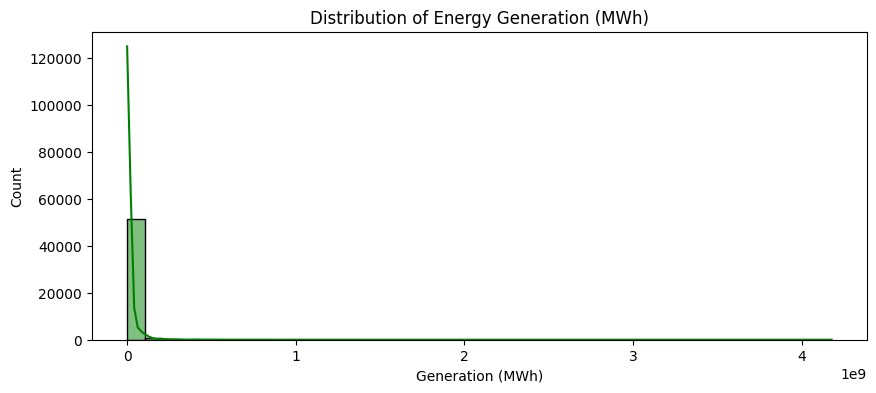

In [58]:
# Distribution of Energy Generation
plt.figure(figsize=(10, 4))
sns.histplot(energy_gen["Genration"], bins=40, kde=True, color="green")
plt.title("Distribution of Energy Generation (MWh)")
plt.xlabel("Generation (MWh)")
plt.ylabel("Count")
plt.show()

### Distribution of Energy Generation
1. The majority of the values are very close to zero (left side of the chart).
2. A few values are extremely high (right side), creating a long tail (right skew).

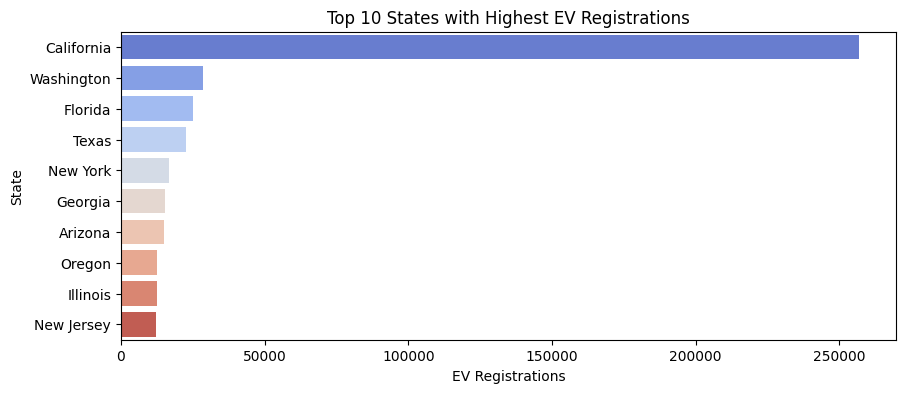

In [59]:
# Top 10 States with Most EV Registrations
top_ev_states = state_reg.sort_values(by="Registration_Count", ascending=False).head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x="Registration_Count", y="State", data=top_ev_states, palette="coolwarm")
plt.title("Top 10 States with Highest EV Registrations")
plt.xlabel("EV Registrations")
plt.ylabel("State")
plt.show()

### EV Registrations:
1. EV Registrations Distribution: Right-skewed (a few states dominate, like California).
2. Average registrations per state: 10659
3. Highest EV registrations: 256800 (California)
4. Lowest EV registrations: 170
5. Most states have below 10,000 registrations.

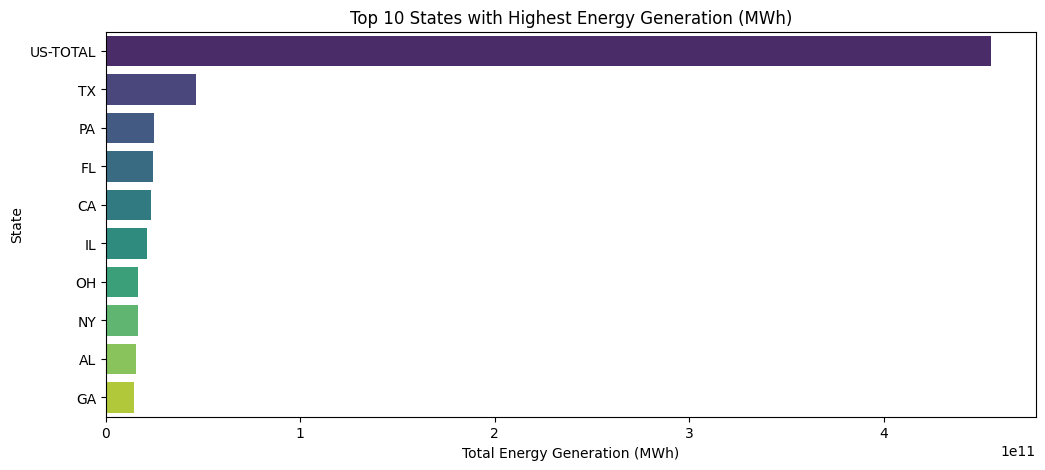

State
US-TOTAL    455416230924
TX           46150360490
PA           24816418361
FL           24226867939
CA           23215345866
IL           21014892413
OH           16645090174
NY           16453455778
AL           15614614189
GA           14574062223
Name: Genration, dtype: int64

In [63]:
# Top 10 States with Highest Energy Generation
top_energy_states = energy_gen.groupby("State")["Genration"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_energy_states.values, y=top_energy_states.index, palette="viridis")
plt.title("Top 10 States with Highest Energy Generation (MWh)")
plt.xlabel("Total Energy Generation (MWh)")
plt.ylabel("State")
plt.show()
top_energy_states

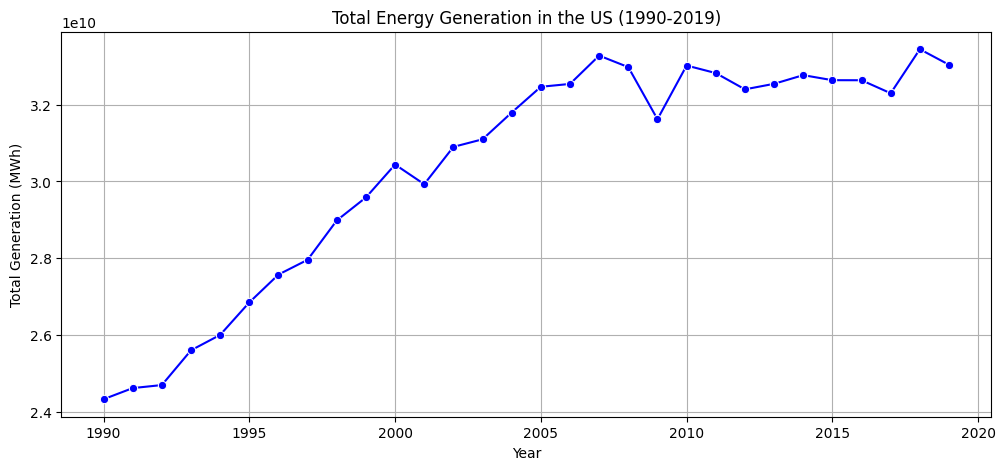

In [61]:
# Yearly Energy Generation Trends
plt.figure(figsize=(12, 5))
sns.lineplot(data=energy_gen.groupby("Year")["Genration"].sum().reset_index(),
             x="Year", y="Genration", marker="o", color="blue")
plt.title("Total Energy Generation in the US (1990-2019)")
plt.xlabel("Year")
plt.ylabel("Total Generation (MWh)")
plt.grid(True)
plt.show()

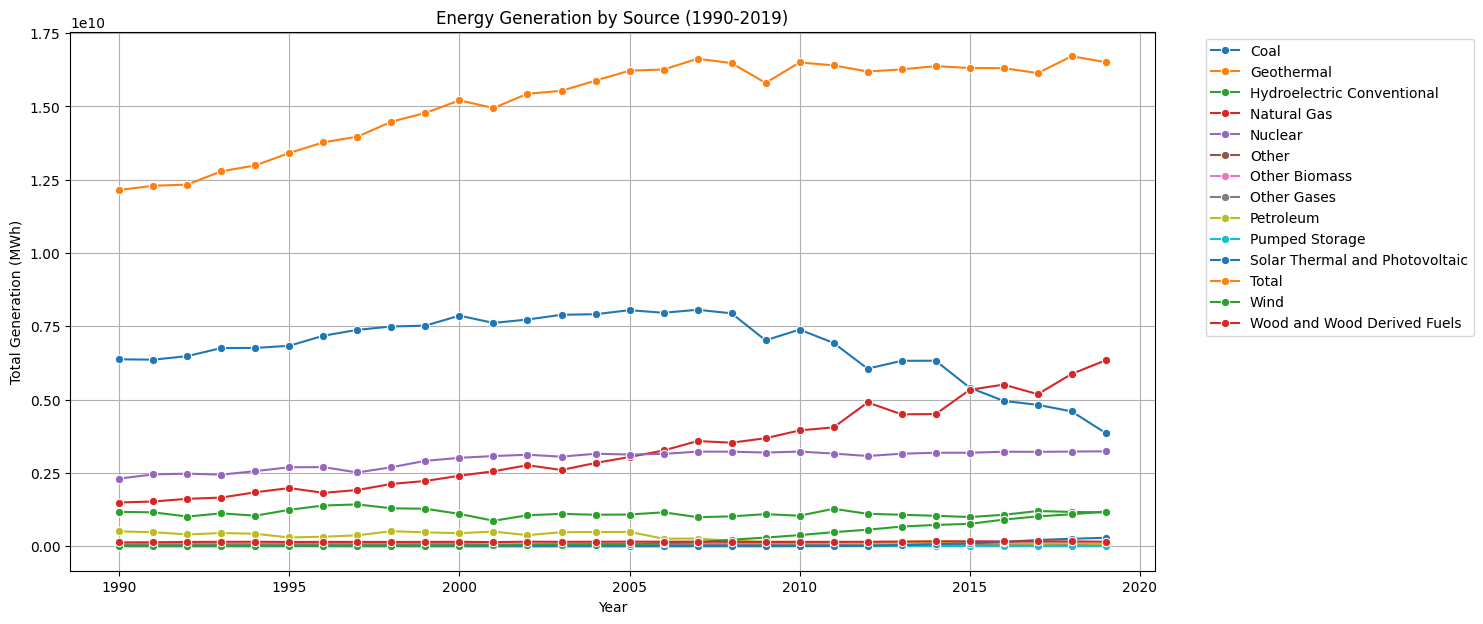

In [62]:
# Energy Generation by Source Over Time
energy_source_trends = energy_gen.groupby(["Year","Energy Source"])["Genration"].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=energy_source_trends, x="Year", y="Genration", hue="Energy Source", palette="tab10",marker="o")
plt.title("Energy Generation by Source (1990-2019)")
plt.xlabel("Year")
plt.ylabel("Total Generation (MWh)")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

### Energy Source Trends (1990-2019)

1. Fossil fuels (Coal, Natural Gas) were dominant in the 1990s.
2. Coal declined after 2008, while Natural Gas and Renewables increased.
3. Renewables (Wind, Solar) are on a steady rise.

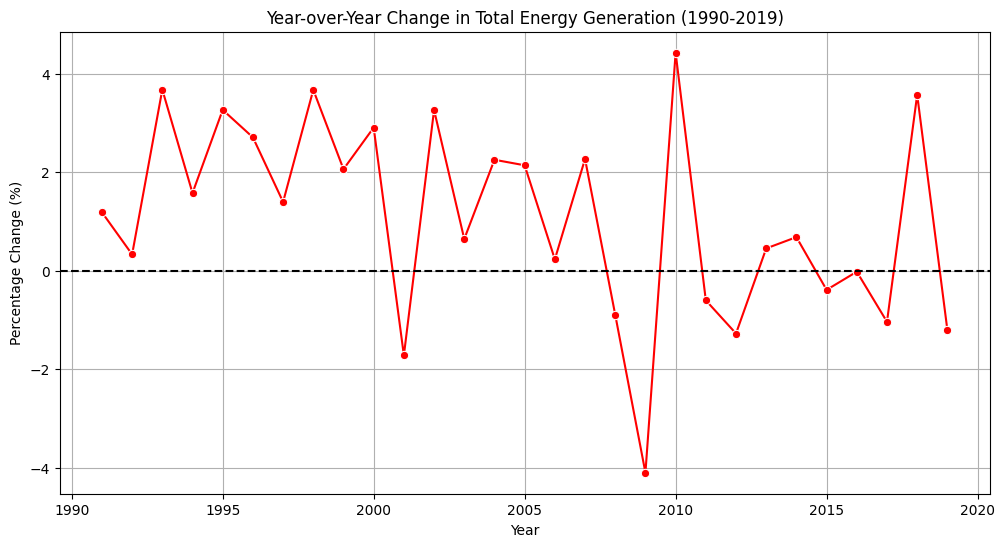

In [45]:
# Checking seasonal trends: Monthly average analysis
energy_gen["Year"] = energy_gen["Year"].astype(int)
df_energy_trend = energy_gen[energy_gen["Energy Source"] == "Total"].groupby("Year")["Genration"].sum()


# Calculate Year-over-Year percentage change in total generation
df_energy_trend_pct_change = df_energy_trend.pct_change() * 100

# Plot the Year-over-Year change to see variations
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_energy_trend_pct_change.index, y=df_energy_trend_pct_change.values, marker="o", linestyle="-", color="r")
plt.axhline(0, color="black", linestyle="--")  # Reference line at 0%
plt.title("Year-over-Year Change in Total Energy Generation (1990-2019)")
plt.xlabel("Year")
plt.ylabel("Percentage Change (%)")
plt.grid(True)
plt.show()


### Total Energy Generation (1990-2019):
1. The plot shows the trend of total energy generation from 1990 to 2019.
2. There is a steady increase in energy generation over time.
3. Some fluctuations may indicate policy changes, economic shifts, or technological advancements.
4. No clear seasonal pattern, but a long-term upward trend is visible.

### POLICY IMPACT ASSESSMENT

1. Government policies play a crucial role in driving EV adoption and clean energy advancements through financial incentives, regulatory mandates, and infrastructure development.

2. Financial Incentives & Benefits – Governments offer purchase grants, tax credits, and exemptions (import duties, road tolls, registration fees) to reduce EV costs. Non-monetary perks like free parking, access to bus lanes, and charging facilities further encourage adoption.

3. Regulatory Mandates & Targets – Policies set clear goals for phasing out internal combustion vehicles, such as Norway’s target for 100% ZEV sales by 2025.

4.Policy Effectiveness – While incentives boost EV sales in well-supported regions, inadequate infrastructure and economic challenges can hinder success, requiring policy adjustments.




### Conclusion & Recommendations  

#### Key Findings  
1. **EV Adoption Trends** – States with strong policies (e.g., California, New York) have higher EV adoption. Renewable energy production does not directly impact EV adoption; incentives and infrastructure matter more.  
2. **Renewable Energy Growth** – Clean energy policies influence growth more than energy production alone.  
3. **Policy Impact** – Financial incentives boost EV adoption, while regulatory mandates face challenges due to infrastructure and economic factors.  
4. **Predictive Insights** – EV adoption is expected to rise with policy support and lower battery costs, but better data is needed for accurate forecasting.  

#### Recommendations  

**For Policymakers:**  
- Increase financial incentives for EV buyers.  
- Expand EV charging infrastructure.  
- Modernize the grid for better renewable energy use.  
- Ensure policies are balanced to avoid economic issues.  

**For Industry (Automakers, Energy Companies):**  
- Develop affordable EVs for wider adoption.  
- Work with the government to build more charging stations.  
- Use smart grid technology for better energy management.  
- Invest in battery R&D to lower costs and improve performance.  

**For Researchers:**  
- Study the impact of non-financial incentives (e.g., free parking, HOV lanes).  
- Improve forecasting with detailed time-series data.  
- Analyze consumer behavior to identify barriers to EV adoption.